# Deep Q Learning


## Implementation

The Deep Q Learning is a variant of the [Q Learning algorithm](https://en.wikipedia.org/wiki/Q-learning). 
When the state size is too large (or for continuous space), it becomes less and less feasible to store and update the whole Q table.
The Deep Q Learning uses a neural network as a predictor of the Q table.

### Learning algorithm

A deep neural network is used to estimate the Q table.
The tricky part is to train the network in a stable manner.

In the vanilla approach by DeepMind, two main factors helped achieving this goal.

- Using a replay history of previous experience (memory buffer), the learning happens on a random sub sample of the memory. This helps breaking the correlation between a sequence of steps/ recent steps. Hence the agent learns a more generic behavior.

- Use two networks, once for the training and driving the action and one for the target. The target is softly updated every few steps. This further reduce the correlation between action and sequence, plus reduces the so called "moving target" problem. 

We keep a eps-greedy policy when choosing the next action. At the start of the learning the epsilon is large, here we prefer random steps and esploration. The epsilon is progressively reduced, whilst the network predicts better the q value, we move towards explotation. A minimum epsilon is guaranteed to mantain a minimum of exploration.

#### Hyperparameters
In agent
- BUFFER_SIZE:	1e5
- BATCH_SIZE:   256
- GAMMA:        0.99
- TAU:          1e-3
- LR:           5e-4
- UPDATE_EVERY: 4

In dqn:
- n_episodes: 500
- max_t:	  1000
- eps_start:  1.0
- eps_end:    0.01
- eps_decay:  0.9


#### Model architecture

The network is composed of 3 fully connected layers:
- 37x64
- 64x64
- 64x4


## Result

The agent is able to achieve the required performance after 474 episodes.

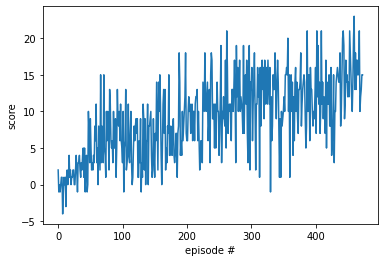

## Possible Improvements
It is possible to further improve the algorithm by implementing additional features:
- "Double DQN", where instead of taking the max of Q_target(s,a) for the next state, we split the process in two. One model is used to predict the action (index of the max) and the other model to evaluate the Q value. This should reduce the over optimistic prediction in untrained model.
- "Dueling DQN", in stead of having one single network predicting the Q value, we use two. The first model predicts the "average" value of given state, the second model predicts the "advantage" to take an action over the other (given a state). The resultant Q is computed by aggregating the two models. Most of the layers in the neural network are shared betwmeen the two models and the last layers are fine tuned to predict the "average" and the "advantage".
- "Prioritized replay", instead of randomly sampling the previous experience, we give sample more the states/actions giving good results so to remember (and learn) more towards the good lessons.
- "Rainbow learning", combining the ones above and other together.